<a href="https://colab.research.google.com/github/AltamarMx/ai_fluidmechanics/blob/main/notebooks/005_Poiseuille_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls drive/MyDrive/Poiseuille/

data  h5


In [6]:
Re      = np.genfromtxt('drive/MyDrive/Poiseuille/data/Re.txt')
profile = np.genfromtxt("./drive/MyDrive/Poiseuille/data/Profile.txt")
r       = np.genfromtxt("./drive/MyDrive/Poiseuille/data/r.txt")
X_train = np.genfromtxt("./drive/MyDrive/Poiseuille/data/X_train.txt")
y_train = np.genfromtxt("./drive/MyDrive/Poiseuille/data/y_train.txt")
X_test  = np.genfromtxt("./drive/MyDrive/Poiseuille/data/X_test.txt")
y_test  = np.genfromtxt("./drive/MyDrive/Poiseuille/data/y_test.txt")

In [9]:
scaler_profile  = np.max(profile)
scaler_reynolds = np.max(Re)
profile_scaled  = profile/scaler_profile
Re_scaled       = Re/scaler_reynolds

In [11]:
file = 'drive/MyDrive/Poiseuille/h5/Poiseuille.h5'
model = tf.keras.models.load_model(
    file,
    custom_objects={'KerasLayer':hub.KerasLayer}
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                200       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


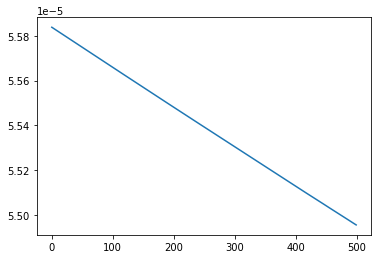

In [13]:
problem = model.fit(X_train,
                    y_train,
                    epochs=500,
                    verbose=False)
plt.plot(problem.history['loss'])

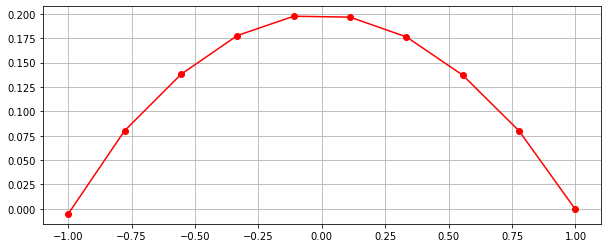

In [37]:
p_profile = model.predict([40]/scaler_reynolds)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(r,p_profile.flatten()*scaler_profile ,'r-o')
ax.grid()
# ax.plot(r,profile[-1] ,'k-')

In [24]:
model.evaluate(X_test,y_test,return_dict=True,batch_size=1)

250/250 [==============================] - 0s 2ms/step - loss: 5.2580e-05


{'loss': 5.2580271585611627e-05}

In [19]:
model.evaluate(X_train,y_train, batch_size=1)

750/750 [==============================] - 1s 2ms/step - loss: 5.4955e-05


5.495456207427196e-05

[evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [20]:
X_test.shape

(250,)

In [22]:
y_test.shape

(250, 10)

In [ ]:
mse = mean((X - Y)**2)

In [29]:
X = model.predict(X_test)
Y = y_test

In [32]:
MSE =np.mean( (X-Y)**2)
MSE

5.258028728418321e-05

In [30]:
def MSE(X, Y):
     return np.square(X - Y).mean()


In [31]:
MSE(X,Y)

5.258028728418321e-05

In [35]:
((np.mean((X - Y)**2))**0.5)*scaler_profile


0.0017904263223435025

## What could you do better to solve this problem? 